# 使用``gluon``手写softmax多类逻辑回归

In [1]:
import mxnet as mx
import numpy as np
from mxnet import nd
from mxnet import autograd
from mxnet import gluon

%matplotlib inline
import matplotlib.pyplot as plt

## 设置context

In [2]:
data_ctx = mx.cpu()
model_ctx = mx.cpu()

## 加载数据集

In [16]:
def transform(data, label):
    return data.astype(np.float32) / 255, label.astype(np.float32)

mnist_train = gluon.data.vision.MNIST(train=True, transform=transform)
mnist_test = gluon.data.vision.MNIST(train=False, transform=transform)

In [4]:
# test
print(len(mnist_train))
print(len(mnist_test))
for data, label in mnist_train:
    print(data.shape)
    print(label)
    break

60000
10000
(28, 28, 1)
5.0


In [5]:
num_inputs = 784
num_outputs = 10
num_examples = len(mnist_train)
batch_size = 64

train_data = gluon.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
test_data = gluon.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False)

## 定义模型

In [6]:
net = gluon.nn.Sequential()
net.add(gluon.nn.Dense(num_outputs))
net.initialize(mx.init.Normal(sigma=1.))

## 定义损失函数

In [7]:
softmax_cross_entropy = gluon.loss.SoftmaxCrossEntropyLoss()

## 定义优化器及参数初始化

In [8]:
learning_rate = 0.1
trainer = gluon.Trainer(net.collect_params(), 'Adam')

## 使用``mx.metric``定义评估函数

In [9]:
# 自己定义评估函数
def evaluate_accuracy(img_iter, net):
    numerator = .0
    denominator = .0
    for i, (data, label) in enumerate(img_iter):
        output = net(data)
        prediction = nd.argmax(output, axis=1)
        numerator += nd.sum(prediction == label)
        denominator += data.shape[0]
    return (numerator / denominator).asscalar()

In [10]:
evaluate_accuracy(train_data, net)

0.067466669

## 训练

In [11]:
epochs = 100
loss_sequences = []

for epoch in range(epochs):
    cumulative_loss = 0.0
    for i, (data, label) in enumerate(train_data):
        with autograd.record():
            output = net(data)
            loss = softmax_cross_entropy(output, label)
        loss.backward()
        trainer.step(batch_size)
        cumulative_loss += nd.sum(loss).asscalar()
        
    train_acc = evaluate_accuracy(train_data, net)
    test_acc = evaluate_accuracy(test_data, net)
    loss_sequences.append(cumulative_loss / num_examples)
    print("Epoch %s, Avg loss %s, Train acc %s, Test acc %s." 
          % (epoch, cumulative_loss / num_examples, train_acc, test_acc))

Epoch 0, Avg loss 4.79390592492, Train acc 0.659033, Test acc 0.6632.
Epoch 1, Avg loss 1.29547568957, Train acc 0.789917, Test acc 0.7931.
Epoch 2, Avg loss 0.882322940119, Train acc 0.832983, Test acc 0.8363.
Epoch 3, Avg loss 0.717502476382, Train acc 0.854983, Test acc 0.8573.
Epoch 4, Avg loss 0.623217672014, Train acc 0.869667, Test acc 0.869.
Epoch 5, Avg loss 0.560353216267, Train acc 0.877883, Test acc 0.8763.
Epoch 6, Avg loss 0.51620293136, Train acc 0.88465, Test acc 0.8811.
Epoch 7, Avg loss 0.482066542399, Train acc 0.88875, Test acc 0.8858.
Epoch 8, Avg loss 0.456311707481, Train acc 0.8943, Test acc 0.8903.
Epoch 9, Avg loss 0.435312823049, Train acc 0.897333, Test acc 0.8915.
Epoch 10, Avg loss 0.417298830032, Train acc 0.9001, Test acc 0.8932.
Epoch 11, Avg loss 0.402165150301, Train acc 0.901983, Test acc 0.8949.
Epoch 12, Avg loss 0.389419847916, Train acc 0.90455, Test acc 0.8976.
Epoch 13, Avg loss 0.377993762835, Train acc 0.905383, Test acc 0.8976.
Epoch 14, Avg

## 绘制损失曲线

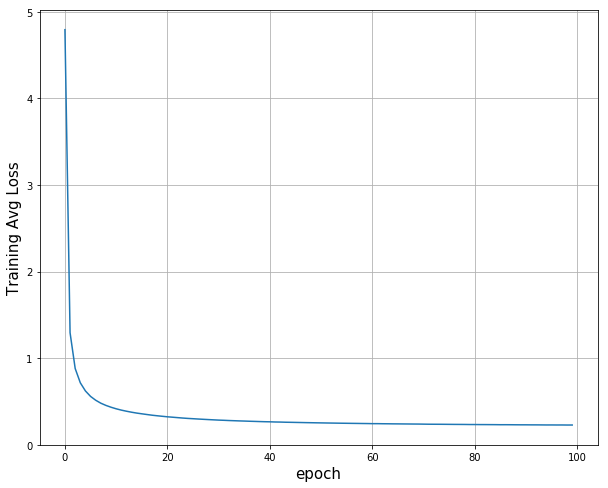

In [12]:
plt.figure(figsize=(10, 8))
plt.plot(list(range(len(loss_sequences))), loss_sequences)
plt.xlabel("epoch", fontsize=15)
plt.ylabel("Training Avg Loss", fontsize=15)
plt.grid(True, which="both")
plt.show()

## 预测

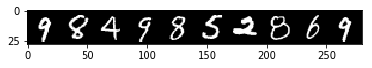

true label: 
[ 9.  8.  4.  9.  8.  5.  2.  8.  6.  9.]
<NDArray 10 @cpu(0)>
predic label: 
[ 9.  8.  4.  9.  8.  5.  2.  8.  3.  9.]
<NDArray 10 @cpu(0)>


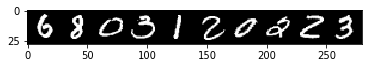

true label: 
[ 6.  8.  0.  3.  1.  2.  0.  2.  2.  3.]
<NDArray 10 @cpu(0)>
predic label: 
[ 6.  8.  0.  3.  1.  2.  0.  2.  5.  3.]
<NDArray 10 @cpu(0)>


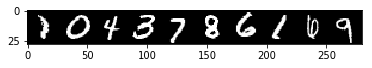

true label: 
[ 1.  0.  4.  3.  7.  8.  6.  1.  6.  9.]
<NDArray 10 @cpu(0)>
predic label: 
[ 1.  0.  4.  3.  7.  8.  6.  1.  6.  9.]
<NDArray 10 @cpu(0)>


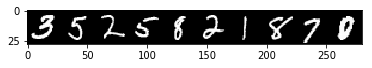

true label: 
[ 3.  5.  2.  5.  8.  2.  1.  8.  7.  0.]
<NDArray 10 @cpu(0)>
predic label: 
[ 3.  5.  2.  5.  8.  2.  1.  8.  7.  8.]
<NDArray 10 @cpu(0)>


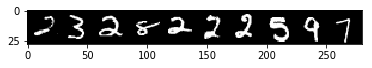

true label: 
[ 2.  3.  2.  8.  2.  2.  2.  5.  9.  7.]
<NDArray 10 @cpu(0)>
predic label: 
[ 2.  3.  2.  8.  2.  2.  2.  5.  9.  7.]
<NDArray 10 @cpu(0)>


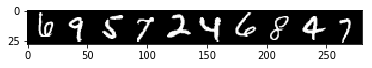

true label: 
[ 6.  9.  5.  7.  2.  4.  6.  8.  4.  7.]
<NDArray 10 @cpu(0)>
predic label: 
[ 6.  9.  6.  7.  2.  4.  6.  8.  4.  7.]
<NDArray 10 @cpu(0)>


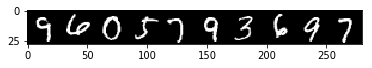

true label: 
[ 9.  6.  0.  5.  7.  9.  3.  6.  9.  7.]
<NDArray 10 @cpu(0)>
predic label: 
[ 9.  6.  0.  5.  7.  9.  3.  6.  9.  7.]
<NDArray 10 @cpu(0)>


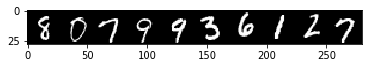

true label: 
[ 8.  0.  7.  9.  9.  3.  6.  1.  2.  7.]
<NDArray 10 @cpu(0)>
predic label: 
[ 8.  7.  7.  9.  9.  3.  6.  1.  2.  7.]
<NDArray 10 @cpu(0)>


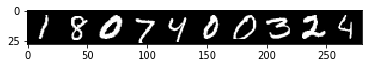

true label: 
[ 1.  8.  0.  7.  4.  0.  0.  3.  2.  4.]
<NDArray 10 @cpu(0)>
predic label: 
[ 1.  8.  0.  7.  4.  0.  0.  3.  2.  4.]
<NDArray 10 @cpu(0)>


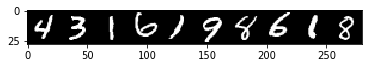

true label: 
[ 4.  3.  1.  6.  1.  9.  8.  6.  1.  8.]
<NDArray 10 @cpu(0)>
predic label: 
[ 4.  3.  1.  6.  1.  9.  4.  6.  1.  8.]
<NDArray 10 @cpu(0)>


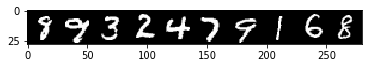

true label: 
[ 8.  9.  3.  2.  4.  7.  9.  1.  6.  8.]
<NDArray 10 @cpu(0)>
predic label: 
[ 7.  7.  3.  2.  4.  7.  9.  1.  6.  8.]
<NDArray 10 @cpu(0)>


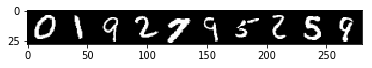

true label: 
[ 0.  1.  9.  2.  7.  9.  5.  2.  5.  9.]
<NDArray 10 @cpu(0)>
predic label: 
[ 0.  1.  9.  2.  7.  9.  5.  8.  5.  9.]
<NDArray 10 @cpu(0)>


In [13]:
def model_predictions(data, net):
    output = net(data)
    return nd.argmax(output, axis=1)

sample_data = gluon.data.DataLoader(mnist_test, 10, shuffle=True)
for i, (data, label) in enumerate(sample_data):
    img_trans = nd.transpose(data, (1,0,2,3))
    img_concat = img_trans.reshape((img_trans.shape[0], -1, 1))
    img_tile = nd.tile(img_concat, (1,1,3))
    plt.imshow(img_tile.asnumpy())
    plt.show()
    print("true label:", label)
    prediction = model_predictions(data, net)
    print("predic label:", prediction)
    if i > 10:
        break

## 保存模型到本地

In [14]:
net.collect_params().save("mnist-softmaxlr-20180112.params")